<a href="https://colab.research.google.com/github/hihijimin/python_exercise/blob/master/keras%20%EC%98%81%ED%99%94%20%EB%A6%AC%EB%B7%B0%20%EB%B6%84%EB%A5%98%3A%20%EC%9D%B4%EC%A7%84%20%EB%B6%84%EB%A5%98%20%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
### 영화 분류 2진 분류 문제
# 2019.11.13

In [2]:
import tensorflow as tf

In [3]:
from keras.datasets import imdb

Using TensorFlow backend.


In [0]:
# from keras.dataset import imdb
(train_data, train_labels),(test_data, test_labels)=imdb.load_data(num_words=10000)

In [6]:
max([max(se) for se in train_data])

9999

In [0]:
#시험삼아 단어 데이터 하나를 바꿔 보겟어 
word_index = imdb.get_word_index()
reverse_word_index =dict([(value, key) for(key, value) in word_index.items()])
decorded_review =' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  result =np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    result[i,sequence]=1.
  return result

x_train =vectorize_sequences(train_data)
x_test =vectorize_sequences(test_data)

In [47]:
x_train[0:].shape

(25000, 10000)

In [0]:
y_train =np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')


In [52]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [53]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=[tf.keras.metrics.binary_accuracy])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
x_val =x_train[:10000]
partial_x_train =x_train[10000:]
y_val =y_train[:10000]
partial_y_train =y_train[10000:]

In [56]:
#모델 훈련하기
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history=model.fit(partial_x_train, partial_y_train,
                  epochs=20, batch_size=512, validation_data=(x_val,y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 131us/sample - loss: 0.5377 - acc: 0.7793 - val_loss: 0.4096 - val_acc: 0.8678
Epoch 2/20
15000/15000 [==============================] - 1s 92us/sample - loss: 0.3273 - acc: 0.9000 - val_loss: 0.3188 - val_acc: 0.8845
Epoch 3/20
15000/15000 [==============================] - 1s 92us/sample - loss: 0.2341 - acc: 0.9269 - val_loss: 0.3173 - val_acc: 0.8721
Epoch 4/20
15000/15000 [==============================] - 1s 91us/sample - loss: 0.1837 - acc: 0.9417 - val_loss: 0.2855 - val_acc: 0.8858
Epoch 5/20
15000/15000 [==============================] - 1s 91us/sample - loss: 0.1474 - acc: 0.9535 - val_loss: 0.2937 - val_acc: 0.8838
Epoch 6/20
15000/15000 [==============================] - 1s 93us/sample - loss: 0.1225 - acc: 0.9640 - val_loss: 0.2936 - val_acc: 0.8834
Epoch 7/20
15000/15000 [==============================] - 1s 92us/sample - loss: 0.1012 - acc: 0.9703 - val_loss: 0

NameError: ignored

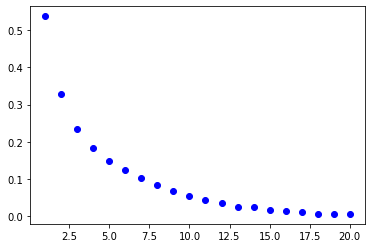

In [61]:
import matplotlib.pyplot as plt

history_dict = history.history
loss =history_dict['loss']
loss_val=history_dict['val_loss']

epochs =range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo',label='Train_result')
plt.plot(epochs, val_loss, 'b', label='Train_Val_result')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legand()
plt.show()

In [60]:
history_dict.

<function dict.keys>